/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


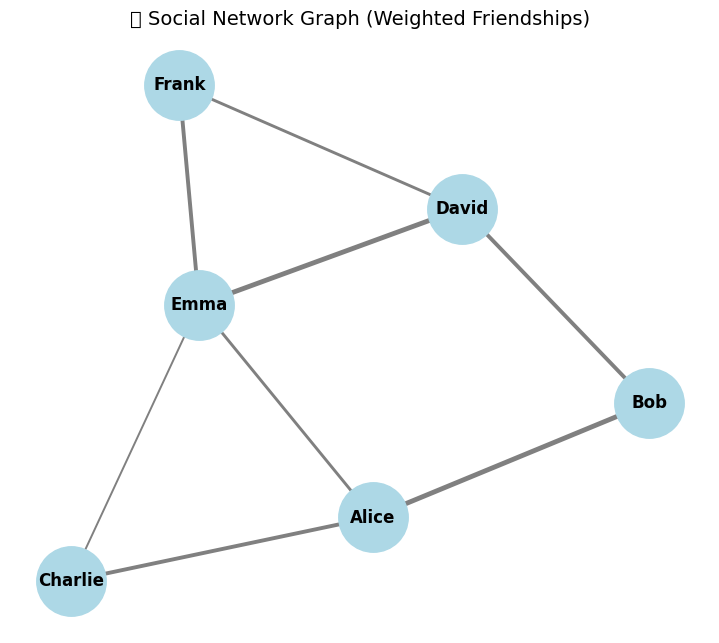

📊 Node-Level Graph Metrics:

         Degree  Clustering  Degree Centrality  Betweenness Centrality  \
Alice         3        0.19                0.6                     0.2   
Bob           2        0.00                0.4                     0.0   
Charlie       2        0.58                0.4                     0.0   
David         3        0.26                0.6                     0.1   
Emma          4        0.23                0.8                     0.4   
Frank         2        0.78                0.4                     0.0   

         Closeness Centrality  
Alice                    0.71  
Bob                      0.62  
Charlie                  0.62  
David                    0.71  
Emma                     0.83  
Frank                    0.62  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


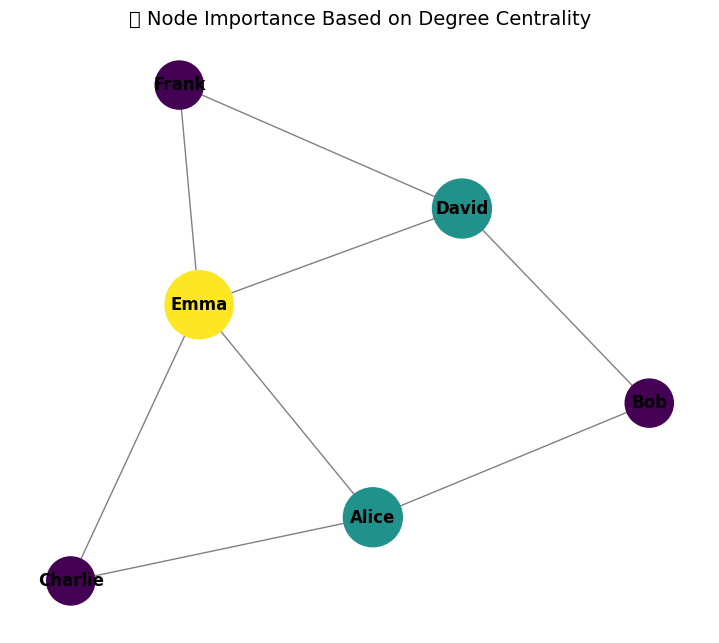

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


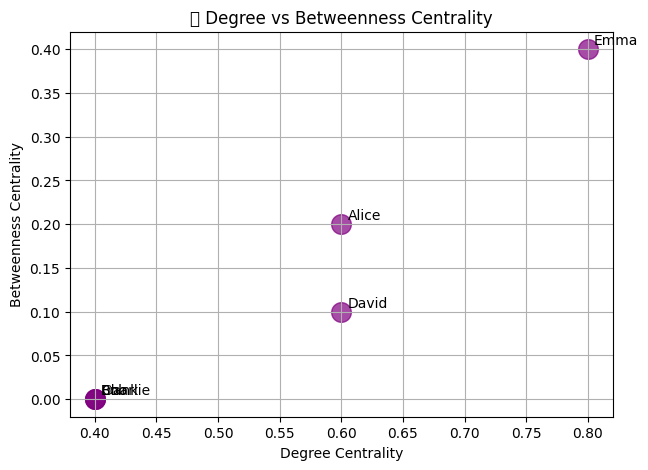

In [5]:
# ===========================================
# 🧠 STEP 1: Install and Import Required Libraries
# ===========================================
!pip install networkx matplotlib --quiet

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# ===========================================
# 🧩 STEP 2: Create a Weighted Social Network Graph
# ===========================================
G = nx.Graph()

# Add nodes (people)
G.add_nodes_from(["Alice", "Bob", "Charlie", "David", "Emma", "Frank"])

# Add weighted edges (representing friendship strength)
G.add_weighted_edges_from([
    ("Alice", "Bob", 5),
    ("Alice", "Charlie", 4),
    ("Alice", "Emma", 3),
    ("Bob", "David", 4),
    ("Charlie", "Emma", 2),
    ("David", "Emma", 5),
    ("David", "Frank", 3),
    ("Emma", "Frank", 4)
])

# ===========================================
# 📊 STEP 3: Visualize the Graph
# ===========================================
pos = nx.spring_layout(G, seed=42)  # for consistent layout
weights = [G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(7, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', width=[w * 0.7 for w in weights],
        node_size=2500, font_size=12, font_weight='bold')
plt.title("💬 Social Network Graph (Weighted Friendships)", fontsize=14)
plt.show()

# ===========================================
# 📈 STEP 4: Compute Graph Analytics Metrics
# ===========================================
# Degree
degree_dict = dict(G.degree())
# Clustering Coefficient
clustering = nx.clustering(G, weight='weight')
# Centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G)

# Display metrics
df_metrics = pd.DataFrame({
    "Degree": degree_dict,
    "Clustering": clustering,
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality
})
print("📊 Node-Level Graph Metrics:\n")
print(df_metrics.round(2))

# ===========================================
# 🎨 STEP 5: Visualize Node Importance (Degree Centrality)
# ===========================================
plt.figure(figsize=(7, 6))
sizes = [v * 3000 for v in degree_centrality.values()]
nx.draw(G, pos, with_labels=True, node_color=list(degree_centrality.values()),
        cmap=plt.cm.viridis, edge_color='gray', node_size=sizes,
        font_size=12, font_weight='bold')
plt.title("🌐 Node Importance Based on Degree Centrality", fontsize=14)
plt.show()

# ===========================================
# 📊 STEP 6: Compare Centralities
# ===========================================
plt.figure(figsize=(7, 5))
plt.scatter(df_metrics["Degree Centrality"], df_metrics["Betweenness Centrality"],
            s=200, color='purple', alpha=0.7)
for node in df_metrics.index:
    plt.text(df_metrics["Degree Centrality"][node] + 0.005,
             df_metrics["Betweenness Centrality"][node] + 0.005, node)
plt.title("📈 Degree vs Betweenness Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.grid(True)
plt.show()
